# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset

In [26]:
ranking = pd.read_csv('./datasets/created/rank_copa_america.csv')
ranking.date = pd.to_datetime(ranking.date)

ranking.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
346,2024-06-11,Chile,Paraguay,3,0,Friendly,Santiago,Chile,False,1489.82,1489.82,42.0,2.0,1430.73,1430.73,56.0,3.0
347,2024-06-12,Ecuador,Bolivia,3,1,Friendly,Chester,United States,True,1519.20,1519.20,31.0,-1.0,1284.55,1284.55,86.0,1.0
348,2024-06-12,United States,Brazil,1,1,Friendly,Orlando,United States,False,1661.70,1665.27,13.0,1.0,1784.09,1784.09,5.0,0.0
349,2024-06-15,Colombia,Bolivia,3,0,Friendly,Denver,United States,True,1655.29,1655.29,14.0,0.0,1284.55,1284.55,86.0,1.0
350,2024-06-16,Panama,Paraguay,0,1,Friendly,Panama City,Panama,False,1475.62,1475.62,44.0,3.0,1430.73,1430.73,56.0,3.0


In [27]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = ranking.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)
results

,0,1,2
0,0,3,0
1,0,3,0
2,0,3,0
3,0,3,0
4,0,3,0
...,...,...,...
346,0,3,0
347,0,3,0
348,2,1,1
349,0,3,0


In [28]:
ranking[["result", "home_team_points", "away_team_points"]] = results
ranking.tail()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away,result,home_team_points,away_team_points
346,2024-06-11,Chile,Paraguay,3,0,Friendly,Santiago,Chile,False,1489.82,1489.82,42.0,2.0,1430.73,1430.73,56.0,3.0,0,3,0
347,2024-06-12,Ecuador,Bolivia,3,1,Friendly,Chester,United States,True,1519.20,1519.20,31.0,-1.0,1284.55,1284.55,86.0,1.0,0,3,0
348,2024-06-12,United States,Brazil,1,1,Friendly,Orlando,United States,False,1661.70,1665.27,13.0,1.0,1784.09,1784.09,5.0,0.0,2,1,1
349,2024-06-15,Colombia,Bolivia,3,0,Friendly,Denver,United States,True,1655.29,1655.29,14.0,0.0,1284.55,1284.55,86.0,1.0,0,3,0
350,2024-06-16,Panama,Paraguay,0,1,Friendly,Panama City,Panama,False,1475.62,1475.62,44.0,3.0,1430.73,1430.73,56.0,3.0,1,0,3


<Axes: >

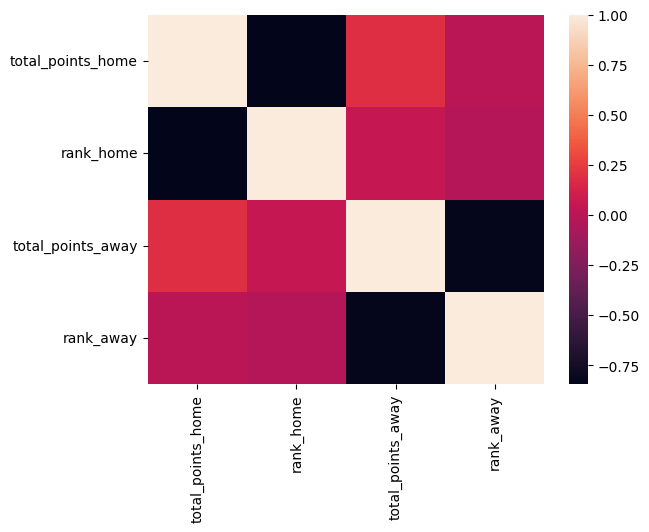

In [29]:
import seaborn as sns

sns.heatmap(ranking[["total_points_home", "rank_home", "total_points_away", "rank_away"]].corr())

In [30]:
ranking["rank_dif"] = ranking["rank_home"] - ranking["rank_away"]
ranking["sg"] = ranking["home_score"] - ranking["away_score"]
ranking["points_home_by_rank"] = ranking["home_team_points"]/ranking["rank_away"]
ranking["points_away_by_rank"] = ranking["away_team_points"]/ranking["rank_home"]

In [31]:
home_team = ranking[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_dif", "points_home_by_rank", "home_team_points"]]
away_team = ranking[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_dif", "points_away_by_rank", "away_team_points"]]

In [32]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]
away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [33]:
home_team

,date,team,score,suf_score,rank,rank_suf,rank_change,total_points,result,rank_dif,points_by_rank,team_points
0,2018-03-27,United States,1,0,25.0,30.0,1.0,876.00,0,-5.0,0.100000,3
1,2018-05-28,United States,3,0,24.0,57.0,0.0,880.00,0,-33.0,0.052632,3
2,2018-06-22,Brazil,2,0,2.0,23.0,0.0,1431.00,0,-21.0,0.130435,3
3,2018-07-02,Brazil,2,0,4.0,10.0,1.0,2160.00,0,-6.0,0.300000,3
4,2018-09-07,Ecuador,2,0,60.0,54.0,0.0,1376.00,0,6.0,0.055556,3
...,...,...,...,...,...,...,...,...,...,...,...,...
346,2024-06-11,Chile,3,0,42.0,56.0,2.0,1489.82,0,-14.0,0.053571,3
347,2024-06-12,Ecuador,3,1,31.0,86.0,-1.0,1519.20,0,-55.0,0.034884,3
348,2024-06-12,United States,1,1,13.0,5.0,1.0,1661.70,2,8.0,0.200000,1
349,2024-06-15,Colombia,3,0,14.0,86.0,0.0,1655.29,0,-72.0,0.034884,3


In [34]:
away_team

,date,team,score,suf_score,rank,rank_suf,rank_change,total_points,result,rank_dif,points_by_rank,team_points
0,2018-03-27,Paraguay,0,1,30.0,25.0,0.0,816.00,0,-5.0,0.000000,0
1,2018-05-28,Bolivia,0,3,57.0,24.0,0.0,548.00,0,-33.0,0.000000,0
2,2018-06-22,Costa Rica,0,2,23.0,2.0,-2.0,884.00,0,-21.0,0.000000,0
3,2018-07-02,Mexico,0,2,10.0,4.0,-5.0,2041.00,0,-6.0,0.000000,0
4,2018-09-07,Jamaica,0,2,54.0,60.0,0.0,1400.00,0,6.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
346,2024-06-11,Paraguay,0,3,56.0,42.0,3.0,1430.73,0,-14.0,0.000000,0
347,2024-06-12,Bolivia,1,3,86.0,31.0,1.0,1284.55,0,-55.0,0.000000,0
348,2024-06-12,Brazil,1,1,5.0,13.0,0.0,1784.09,2,8.0,0.076923,1
349,2024-06-15,Bolivia,0,3,86.0,14.0,1.0,1284.55,0,-72.0,0.000000,0


In [35]:
team_stats = pd.concat([home_team, away_team], axis=0)

In [36]:
team_stats

,date,team,score,suf_score,rank,rank_suf,rank_change,total_points,result,rank_dif,points_by_rank,team_points
0,2018-03-27,United States,1,0,25.0,30.0,1.0,876.00,0,-5.0,0.100000,3
1,2018-05-28,United States,3,0,24.0,57.0,0.0,880.00,0,-33.0,0.052632,3
2,2018-06-22,Brazil,2,0,2.0,23.0,0.0,1431.00,0,-21.0,0.130435,3
3,2018-07-02,Brazil,2,0,4.0,10.0,1.0,2160.00,0,-6.0,0.300000,3
4,2018-09-07,Ecuador,2,0,60.0,54.0,0.0,1376.00,0,6.0,0.055556,3
...,...,...,...,...,...,...,...,...,...,...,...,...
346,2024-06-11,Paraguay,0,3,56.0,42.0,3.0,1430.73,0,-14.0,0.000000,0
347,2024-06-12,Bolivia,1,3,86.0,31.0,1.0,1284.55,0,-55.0,0.000000,0
348,2024-06-12,Brazil,1,1,5.0,13.0,0.0,1784.09,2,8.0,0.076923,1
349,2024-06-15,Bolivia,0,3,86.0,14.0,1.0,1284.55,0,-72.0,0.000000,0


In [37]:
#change date to datetime
team_stats.date = pd.to_datetime(team_stats.date)

In [40]:
stats_val = []

for index, row in team_stats.iterrows():
    team = row["team"]
    date = row["date"]
    past_games = team_stats.loc[(team_stats["team"] == team) & (team_stats["date"] < date)].sort_values(by=['date'], ascending=False)
    last5 = past_games.head(5)
    
    # Calcular las medias solo si past_games no está vacío
    if not past_games.empty:
        goals = past_games["score"].mean()
        goals_suf = past_games["suf_score"].mean()
        rank = past_games["rank_suf"].mean()
        gp = past_games["team_points"].mean()
        gp_rank = past_games["points_by_rank"].mean()
    else:
        goals = goals_suf = rank = gp = gp_rank = 0
    
    # Calcular las medias solo si last5 no está vacío
    if not last5.empty:
        goals_l5 = last5["score"].mean()
        goals_suf_l5 = last5["suf_score"].mean()
        rank_l5 = last5["rank_suf"].mean()
        gp_l5 = last5["team_points"].mean()
        gp_rank_l5 = last5["points_by_rank"].mean()
        
        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]
        points_l5 = last5["total_points"].values[0] - last5["total_points"].values[-1]
    else:
        goals_l5 = goals_suf_l5 = rank_l5 = gp_l5 = gp_rank_l5 = 0
        points = points_l5 = 0
        
    stats_val.append([goals, goals_l5, goals_suf, goals_suf_l5, rank, rank_l5, points, points_l5, gp, gp_l5, gp_rank, gp_rank_l5])


In [41]:
stats_val

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1.0, 1.0, 0.0, 0.0, 30.0, 30.0, 0.0, 0.0, 3.0, 3.0, 0.1, 0.1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2.0,
  2.0,
  0.0,
  0.0,
  23.0,
  23.0,
  0.0,
  0.0,
  3.0,
  3.0,
  0.13043478260869565,
  0.13043478260869565],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.0, 0.0, 2.0, 2.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [2.0,
  2.0,
  0.0,
  0.0,
  43.5,
  43.5,
  4.0,
  4.0,
  3.0,
  3.0,
  0.07631578947368421,
  0.07631578947368421],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2.0,
  2.0,
  1.0,
  1.0,
  31.0,
  31.0,
  0.0,
  0.0,
  3.0,
  3.0,
  0.0967741935483871,
  0.0967741935483871],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1.3333333333333333,
  1.3333333333333333,
  0.6666666666666666,
  0.6666666666666666,
  30.0,
  30.0,
  632.0,
  632.0,
  2.0,
  2.0,
  0.05087719298245614,
  0.05087719298245614],
 [0.3333333333333333,
  0.3333333333333333,
  2.3333333333333335,
  2.3333333333333335,
  10.333333333333334,
  10.333333333333334,
  -481.

In [42]:
stats_mean = ["goals_mean", "goals_mean_l5", "goals_suf_mean", "goals_suf_mean_l5", "rank_mean", "rank_mean_l5", "points_mean", "points_mean_l5", "game_points_mean", "game_points_mean_l5", "game_points_rank_mean", "game_points_rank_mean_l5"]

In [43]:
stats_df = pd.DataFrame(stats_val, columns=stats_mean)

full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

In [44]:
full_df

,date,team,score,suf_score,rank,rank_suf,rank_change,total_points,result,rank_dif,...,goals_suf_mean,goals_suf_mean_l5,rank_mean,rank_mean_l5,points_mean,points_mean_l5,game_points_mean,game_points_mean_l5,game_points_rank_mean,game_points_rank_mean_l5
0,2018-03-27,United States,1,0,25.0,30.0,1.0,876.00,0,-5.0,...,0.000000,0.0,0.000000,0.0,0.00,0.00,0.000000,0.0,0.000000,0.000000
1,2018-05-28,United States,3,0,24.0,57.0,0.0,880.00,0,-33.0,...,0.000000,0.0,30.000000,30.0,0.00,0.00,3.000000,3.0,0.100000,0.100000
2,2018-06-22,Brazil,2,0,2.0,23.0,0.0,1431.00,0,-21.0,...,0.000000,0.0,0.000000,0.0,0.00,0.00,0.000000,0.0,0.000000,0.000000
3,2018-07-02,Brazil,2,0,4.0,10.0,1.0,2160.00,0,-6.0,...,0.000000,0.0,23.000000,23.0,0.00,0.00,3.000000,3.0,0.130435,0.130435
4,2018-09-07,Ecuador,2,0,60.0,54.0,0.0,1376.00,0,6.0,...,0.000000,0.0,0.000000,0.0,0.00,0.00,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,2024-06-11,Paraguay,0,3,56.0,42.0,3.0,1430.73,0,-14.0,...,1.225000,0.4,26.375000,34.2,614.73,-1.35,0.850000,1.0,0.047514,0.018695
698,2024-06-12,Bolivia,1,3,86.0,31.0,1.0,1284.55,0,-55.0,...,2.292683,1.4,25.585366,29.2,736.55,-3.31,0.463415,0.6,0.020100,0.023077
699,2024-06-12,Brazil,1,1,5.0,13.0,0.0,1784.09,2,8.0,...,0.500000,1.6,28.391304,20.6,353.09,-53.52,2.217391,0.8,0.116401,0.043774
700,2024-06-15,Bolivia,0,3,86.0,14.0,1.0,1284.55,0,-72.0,...,2.309524,1.6,25.714286,27.8,736.55,-3.31,0.452381,0.6,0.019621,0.023077


In [45]:
stats_df

,goals_mean,goals_mean_l5,goals_suf_mean,goals_suf_mean_l5,rank_mean,rank_mean_l5,points_mean,points_mean_l5,game_points_mean,game_points_mean_l5,game_points_rank_mean,game_points_rank_mean_l5
0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.00,0.000000,0.0,0.000000,0.000000
1,1.000000,1.0,0.000000,0.0,30.000000,30.0,0.00,0.00,3.000000,3.0,0.100000,0.100000
2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.00,0.000000,0.0,0.000000,0.000000
3,2.000000,2.0,0.000000,0.0,23.000000,23.0,0.00,0.00,3.000000,3.0,0.130435,0.130435
4,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.00,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
697,0.675000,0.2,1.225000,0.4,26.375000,34.2,614.73,-1.35,0.850000,1.0,0.047514,0.018695
698,0.853659,0.6,2.292683,1.4,25.585366,29.2,736.55,-3.31,0.463415,0.6,0.020100,0.023077
699,1.891304,1.0,0.500000,1.6,28.391304,20.6,353.09,-53.52,2.217391,0.8,0.116401,0.043774
700,0.857143,0.6,2.309524,1.6,25.714286,27.8,736.55,-3.31,0.452381,0.6,0.019621,0.023077


In [46]:
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [47]:
home_team_stats = home_team_stats[home_team_stats.columns[-12:]]
away_team_stats = away_team_stats[away_team_stats.columns[-12:]]

In [48]:
home_team_stats.columns = ['home_'+str(col) for col in home_team_stats.columns]
away_team_stats.columns = ['away_'+str(col) for col in away_team_stats.columns]

In [49]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)


In [50]:
full_df = pd.concat([ranking, match_stats.reset_index(drop=True)], axis=1, ignore_index=False)


In [51]:
full_df.tournament.value_counts()

tournament
FIFA World Cup qualification    149
Friendly                        108
Copa América                     48
CONCACAF Nations League          22
Gold Cup                         19
FIFA World Cup                    3
Superclásico de las Américas      2
Name: count, dtype: int64

In [52]:
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

full_df["is_friendly"] = full_df["tournament"].apply(lambda x: find_friendly(x)) 

In [53]:
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

In [54]:
full_df = pd.get_dummies(full_df, columns=["is_friendly"])


In [55]:
base_df = full_df[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5','home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5','away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5',
       'is_friendly_0', 'is_friendly_1']]

In [56]:
base_df_no_fg = base_df.dropna()
base_df_no_fg.head()

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1
0,2018-03-27,United States,Paraguay,25.0,30.0,1,0,0,-5.0,1.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,False,True
1,2018-05-28,United States,Bolivia,24.0,57.0,3,0,0,-33.0,0.0,...,3.0,3.0,0.100000,0.100000,0.0,0.0,0.0,0.0,False,True
2,2018-06-22,Brazil,Costa Rica,2.0,23.0,2,0,0,-21.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,True,False
3,2018-07-02,Brazil,Mexico,4.0,10.0,2,0,0,-6.0,1.0,...,3.0,3.0,0.130435,0.130435,0.0,0.0,0.0,0.0,True,False
4,2018-09-07,Ecuador,Jamaica,60.0,54.0,2,0,0,6.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,False,True


In [57]:
import os

folder_name = "created"
datasets_folder = "./datasets"

new_folder_path = os.path.join(datasets_folder, folder_name)
os.makedirs(new_folder_path, exist_ok=True)

base_df_no_fg.to_csv('./datasets/created/full_db.csv',index=False)

In [58]:
df = base_df_no_fg.copy()


In [59]:
df.columns

Index(['date', 'home_team', 'away_team', 'rank_home', 'rank_away',
       'home_score', 'away_score', 'result', 'rank_dif', 'rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5', 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean', 'home_points_mean_l5',
       'away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5', 'away_rank_mean', 'away_rank_mean_l5',
       'away_points_mean', 'away_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5', 'is_friendly_0', 'is_friendly_1'],
      dtype='object')

In [60]:
df['total_games_away'] = df.apply(lambda x: len(df[(df.home_team == x["away_team"]) & (df.date < x["date"])])+len(df[(df.away_team == x["away_team"]) & (df.date < x["date"])]), axis=1)


In [61]:
df['total_games_home'] = df.apply(lambda x: len(df[(df.home_team == x["home_team"]) & (df.date < x["date"])])+len(df[(df.away_team == x["home_team"]) & (df.date < x["date"])]), axis=1)


In [62]:
df = df[df.rank_home != df.rank_away]


In [63]:
df['home_weight_goals'] = df.apply(lambda x: (x["home_goals_mean"]*x["rank_dif"]), axis =1)


In [64]:
df['away_weight_goals_suf'] = df.apply(lambda x: (x["away_goals_suf_mean"]*x["rank_dif"]), axis =1)


In [65]:
df['home_weight_goals_l5'] = df.apply(lambda x: (x["home_goals_mean_l5"]*x["rank_dif"]), axis =1)


In [66]:
df['away_weight_goals_suf_l5'] = df.apply(lambda x: (x["away_goals_suf_mean_l5"]*x["rank_dif"]), axis =1)


In [67]:
df['home_weight_points'] = df.apply(lambda x: (x["home_game_points_mean"]*x["rank_dif"]), axis =1)


In [68]:
df['away_weight_points'] = df.apply(lambda x: (x["away_game_points_mean"]*x["rank_dif"]), axis =1)


In [69]:
df['away_weight_goals'] = df.apply(lambda x: (x["away_goals_mean"]*x["rank_dif"]), axis =1)
df['home_weight_goals_suf'] = df.apply(lambda x: (x["home_goals_suf_mean"]*x["rank_dif"]), axis =1)

In [70]:
df['away_weight_goals_l5'] = df.apply(lambda x: (x["away_goals_mean_l5"]*x["rank_dif"]), axis =1)
df['home_weight_goals_suf_l5'] = df.apply(lambda x: (x["home_goals_suf_mean_l5"]*x["rank_dif"]), axis =1)

In [71]:
df['home_team'].value_counts()

home_team
United States    43
Argentina        33
Brazil           31
Mexico           30
Peru             27
Colombia         25
Ecuador          22
Venezuela        20
Chile            20
Uruguay          20
Bolivia          18
Costa Rica       16
Panama           14
Paraguay         14
Jamaica          10
Canada            8
Name: count, dtype: int64

In [72]:
df.columns

Index(['date', 'home_team', 'away_team', 'rank_home', 'rank_away',
       'home_score', 'away_score', 'result', 'rank_dif', 'rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5', 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean', 'home_points_mean_l5',
       'away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5', 'away_rank_mean', 'away_rank_mean_l5',
       'away_points_mean', 'away_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5', 'is_friendly_0', 'is_friendly_1',
       'total_games_away', 'total_games_home', 'home_weight_goals',
       'away_weight_goals_suf', 'home_weight_goals_l5',
       'away_weight_goals_suf_l5

In [73]:
import os

folder_name = "created"
datasets_folder = "./datasets"

new_folder_path = os.path.join(datasets_folder, folder_name)
os.makedirs(new_folder_path, exist_ok=True)


df.to_csv("./datasets/created/new_model.csv", index=False)


In [74]:
df_model = df[(df.total_games_home > 5) & (df.total_games_away > 5)]


<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 58 to 1467
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           1393 non-null   datetime64[ns]
 1   home_team                      1393 non-null   object        
 2   away_team                      1393 non-null   object        
 3   rank_home                      1393 non-null   float64       
 4   rank_away                      1393 non-null   float64       
 5   home_score                     1393 non-null   int64         
 6   away_score                     1393 non-null   int64         
 7   result                         1393 non-null   int64         
 8   rank_dif                       1393 non-null   float64       
 9   rank_change_home               1393 non-null   float64       
 10  rank_change_away               1393 non-null   float64       
 11  home_goals_mean      

In [75]:
df_numeric = df_model.select_dtypes(include=['float64', 'int64', 'bool'])
df_numeric.corr()

,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,...,home_weight_goals,away_weight_goals_suf,home_weight_goals_l5,away_weight_goals_suf_l5,home_weight_points,away_weight_points,away_weight_goals,home_weight_goals_suf,away_weight_goals_l5,home_weight_goals_suf_l5
rank_home,1.000000,-0.049946,-0.123779,0.220084,0.059157,0.708416,0.038948,-0.080744,-0.694579,-0.428115,...,0.667652,0.557455,0.612360,0.547301,0.600140,0.738253,0.716644,0.721375,0.637971,0.706713
rank_away,-0.049946,1.000000,0.333971,-0.220557,-0.267342,-0.740297,0.019029,0.052888,-0.035863,0.005268,...,-0.719740,-0.778296,-0.657268,-0.739459,-0.717492,-0.574485,-0.665946,-0.614514,-0.645163,-0.571186
home_score,-0.123779,0.333971,1.000000,-0.094762,-0.545641,-0.319328,-0.053054,0.076624,0.143801,0.147530,...,-0.332247,-0.360964,-0.289356,-0.334869,-0.360130,-0.215705,-0.259197,-0.206836,-0.270683,-0.206247
away_score,0.220084,-0.220557,-0.094762,1.000000,0.258813,0.304006,0.110183,-0.115221,-0.222029,-0.099727,...,0.314842,0.235237,0.292793,0.237508,0.310548,0.328571,0.325843,0.255270,0.330520,0.247694
result,0.059157,-0.267342,-0.545641,0.258813,1.000000,0.228744,-0.053296,-0.157152,-0.082215,-0.066144,...,0.234572,0.241047,0.201194,0.252534,0.252132,0.177409,0.196264,0.150509,0.194579,0.159779
rank_dif,0.708416,-0.740297,-0.319328,0.304006,0.228744,1.000000,0.012770,-0.091726,-0.442192,-0.291895,...,0.958034,0.925238,0.876669,0.890958,0.911002,0.902909,0.952997,0.919836,0.885353,0.879347
rank_change_home,0.038948,0.019029,-0.053054,0.110183,-0.053296,0.012770,1.000000,0.006766,-0.045343,-0.124439,...,0.035888,0.005780,0.044245,0.007524,0.027066,0.012902,0.015498,-0.002890,0.026406,0.001683
rank_change_away,-0.080744,0.052888,0.076624,-0.115221,-0.157152,-0.091726,0.006766,1.000000,0.039937,0.053479,...,-0.065996,-0.100002,-0.056122,-0.109892,-0.065456,-0.050571,-0.059852,-0.095036,-0.051862,-0.092359
home_goals_mean,-0.694579,-0.035863,0.143801,-0.222029,-0.082215,-0.442192,-0.045343,0.039937,1.000000,0.665797,...,-0.450212,-0.337089,-0.438566,-0.329270,-0.443453,-0.479574,-0.463920,-0.385504,-0.395680,-0.390496
home_goals_mean_l5,-0.428115,0.005268,0.147530,-0.099727,-0.066144,-0.291895,-0.124439,0.053479,0.665797,1.000000,...,-0.326097,-0.244478,-0.428643,-0.237786,-0.323295,-0.303151,-0.303631,-0.225127,-0.255713,-0.223434
